# 1. Исследование временного ряда. Определение тренда и сезонности во временном ряду

1. Импорт необходимых для решения задачи библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as st
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

2. Импорт Датасета

In [2]:
ShampooSereis = pd.read_csv("Shift+Enter_Shampoo.csv")

3. Построение графика на основе данного Датасета

In [ ]:
plt.figure(figsize=(19,10))
plt.plot(ShampooSereis['Month'], ShampooSereis['Sales'])
plt.xticks(rotation=90)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sales per month',
fontsize=20)
plt.show()

4. Расчет скользящей средней и ее построение

In [ ]:
MEA_ShampooSereis = ShampooSereis['Sales'].rolling(6)

In [ ]:
plt.figure(figsize=(19,10))
plt.xticks(rotation=90)
plt.plot(ShampooSereis['Month'], MEA_ShampooSereis.mean())
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sales per month',
fontsize=20)
plt.grid(True)
plt.show()

На основе полученного графика можем сделать вывод, что с течением времени общий тренд продаж шампуня менялся. С начала отслежевания до примерно 7го месяца второго года имеем слабовосходящий тренд, а после крутизна трендовой линии меняется в большую сторону, то есть с момента времени 2-07 продажи сильно выросли и оставались в таких объемах до конца наблюдения. Это может быть связано со сменой программы маркетинга данного продукта (постепенное наращивание рекламы, проведение акций), из-за чего продукт стал больше продаваться, и его первоначальные покупатели советовали их знакомым, или с рынка ушел конкурент.
Ниже представлен код для построения прямых, показывающих изменение крутизны тренда. Расчетные формулы для данных кривых:

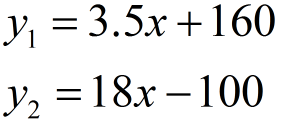

Угловой коэффициент для первой линии равен 3.5, а для второй 18, то есть крутизна линии меняется в 7 раз.

In [ ]:
plt.figure(figsize=(19,10))
plt.xticks(rotation=90)
x = ShampooSereis['Month']
y = MEA_ShampooSereis.mean() # исходный график после экспоненциального сглаживания 
x_line1 = np.arange(5,19)
y_line1 = 3.5*x_line1+160 # выражение для первой прямой, показывающей начальный тренд продаж
x_line2 = np.arange(18,36)
y_line2 = 18*x_line2-100 # выражение для второй прямой, показывающей конечный тренд продаж
lines = plt.plot(x,y, x_line1, y_line1,x_line2,y_line2)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2, color='k')
plt.setp(lines[2], linewidth=2, color='k')
plt.grid(True)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sales per month DES',fontsize=20)
plt.show()


Теперь определим сезонность в данном временном ряду.
Для этого найдем разность между последовательными точками данных, используя функцию pandas - diff.
Построим график, полученный в результате вычисления разности.

In [ ]:
ShampooSereis_Season = ShampooSereis['Sales'].diff(periods=1)
plt.figure(figsize=(19,10))
plt.plot(ShampooSereis['Month'], ShampooSereis_Season)
plt.grid(True)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sales per month Diff', fontsize=20)
plt.show()

На данном графике замечаем, что максимумы чередуются с минимумами, это может означать, что покупатели прообретают товар с периодичностью в 2 месяца. Также раз в 4-5 месяцев наблюдаются ярко выделяющиеся минимумы, отмеченные на рисунке ниже. На основе последнего наблюдения можно сделать вывод, что части покупателей шампуня хватает на 2 месяца, например, семьям, а другой части покупателей хватает на 4-5 месяцев. Таким образом, когда потребности в покупке новой упаковки нет ни у первых, ни у вторых, мы наблюдаем сильный минимум. Это особенно показательно для периода времени после 2-07, где график принимает вид чередующихся букв "М".

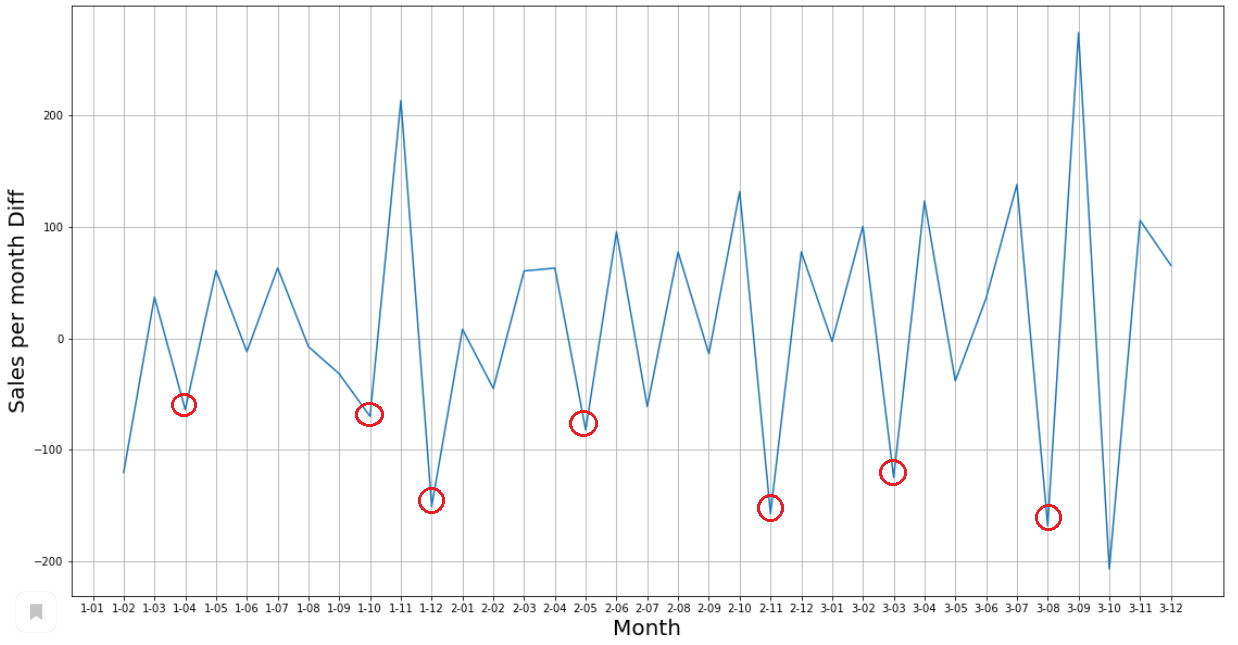



# 2. Исследование периодичности и построение графика автокорреляции

Построим график автокорреляции для данных по продажам шампуня с помощью функции autocorrelation_plot().

In [ ]:
AutoCorr = pd.plotting.autocorrelation_plot(ShampooSereis['Sales'])
AutoCorr.set_xlim([0,35])
plt.show()

Из данного графика следует, что все коэффициенты до 5 лага проходят включительно положительны и их значения выходят за пределы доверительного интервала. Однако из предыдущей части данной работы иы знаем, что график продаж имеет ярко выреженные тренды, следовательно, автокорреляции последовательных лагов связаны между собой. С целью исключить ложные периодические составляющие ряда можно вычислить частную автокорреляцию.
Построим график частной автокорреляции с помощью функции plot_pacf() библиотеки statsmodels и выведем численные значения полученных коэффициентов частной автокорредяции при различном количестве лагов с помощбю функции pacf() той же библиотеки.

In [ ]:
st.graphics.tsa.plot_pacf(x=ShampooSereis['Sales'])
plt.show()

In [ ]:
AutoCorr = pd.DataFrame(st.tsa.stattools.pacf(ShampooSereis['Sales'], 17)).rename(columns={0:'pacf'})
AutoCorr.index.name = 'lags'
AutoCorr

Из последнего графика делаем вывод, что за пределы доверительного инетрвала выходят только коэффициенты при лаге: 1, 2, 12, 15. Положительный коэффициент автокрреляции наблюдаются с лагами равными 1 и 2, а отрицаетельные с лагами равными 12 и 15.
Высокое значение коэффициента автокорреляции при единичном лаге говорит о том, что в данных есть тренд, при лаге равном 2 озночает, что в данных есть циклиеские колебания, то есть в изменении продаж есть некоторая регулярность, проявляющаяся каждые 2 месяца. Отрицательная автокорреляция означает, что наши регрисионные остатки меняют знак относительно линии регрессии.

# 3. Построение модели скользящего прогноза ARIMA


Разделим данные по продаже шампуня на тестовую и тренировочную выборки, 40% и 60% соответственно. Также создадим вектор history с тренировочными данными продаж и пустой вектор predictions куда поместим спрогнозированные значения.

In [5]:
X = ShampooSereis['Sales'].values
size = int(len(X) * 0.6)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

Для построения модели ARIMA необходимо три параметра:
p - порядок авторегрессии
d - порядок интегрирования
q - порядок скользящего среднего
Порядок авторегрессии возьмем равным двум исходя из предыдушей части работы, а порядок интегрирования равным единице, чтобы сделать график продаж стационарным. Рассчитаем модель с данными параметрами:

In [6]:
import warnings
warnings.filterwarnings("ignore")

Shampoo_model = ARIMA(history, order=(2,1,0))
Shampoo_model_fit = Shampoo_model.fit()
Shampoo_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   20
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -111.373
Method:                       css-mle   S.D. of innovations             62.424
Date:                Fri, 30 Jul 2021   AIC                            230.746
Time:                        16:02:49   BIC                            234.729
Sample:                             1   HQIC                           231.523
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1740      7.260      0.575      0.565     -10.055      18.403
ar.L1.D.y     -0.7810      0.228     -3.420      0.001      -1.229      -0.333
ar.L2.D.y     -0.2054      0.228     -0.901      0.368      -0.652       0.242
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9010           -1.1199j            2.2064           -0.4153
AR.2           -1.9010           +1.1199j            2.2064            0.4153
-----------------------------------------------------------------------------
"""

Выполним прогнозирование с помощью рассчитанной модели. Расчитаем среднеквадратичную ошибку и построим график предсказанных значений с тестовыми на одних осях

Test MSE: 6417.558


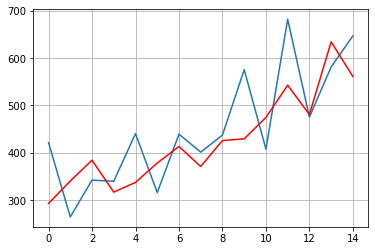

In [7]:
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast()
    pred = forecast[0]
    predictions.append(pred)
    obs = test[t]
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.grid(True)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()